In [213]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns


In [214]:
LOW_QUANTILE = 0.25
HIGH_QUANTILE = 0.2501

# Create a Folder to Store the Results
import os

if not os.path.exists("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE)):
    os.mkdir("Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE))
    
save_path = "Results" + "_" + str(LOW_QUANTILE) + "_" + str(HIGH_QUANTILE) + "/"

## Data

### mRNA Expression Data

In [215]:
mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma mRNA.csv")
mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [216]:
full_mRNA_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Pancancer mRNA.csv")
full_mRNA_df.drop(['Unnamed: 0'], axis=1, inplace=True)

### Gene Dependency Data

In [217]:
dependency_df = pd.read_csv(r'C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\CCLE Chromatin Analysis\Raw Data\CRISPRGeneDependency.csv')
#dependency_df.drop(['Unnamed: 0'], axis=1, inplace=True)
dependency_df.columns = dependency_df.columns.str.replace(r" \(.*\)","")



C:\Users\commo\AppData\Local\Temp\ipykernel_12636\4238185583.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dependency_df.columns = dependency_df.columns.str.replace(r" \(.*\)","")


In [218]:
full_mRNA_df = full_mRNA_df[full_mRNA_df['Cell Line'].isin(dependency_df['ModelID'])]
full_mRNA_df.reset_index(inplace=True, drop=True)

### Cell Lines Data

In [219]:
cell_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Depmap Melanoma Cells.csv")
cell_df.drop(['Unnamed: 0'], axis=1, inplace=True)
print(cell_df.shape)

(41, 8)


### Chromatin Modifying Genes

In [220]:
chromatin_genes_df = pd.read_csv(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\BME\Fallahi Sichani Lab Work\Gene Co-Expression KO Analysis\Chromatin Genes.csv")
chromatin_genes_df.head(5)

,Gene
0,ACTB
1,ACTL6A
2,ACTL6B
3,AKAP8
4,AKAP8L


## Analysis

### Validating Assumptions / mRNA Quartiles

#### Normality Test (Shapiro-Wilk Test) for mRNA Expression and Gene Dependency

In [221]:
# Shapiro-Wilk Test for Normality for All Genes in Gene mRNA Expression Data
# Interpretation: p-value < 0.05, therefore  mRNA data is not normally distributed
results = []
for gene in mRNA_df.columns[1:]:
    results.append((gene,stats.shapiro(mRNA_df[gene])[0],stats.shapiro(mRNA_df[gene])[1]))
    
shapiro_df = pd.DataFrame(results, columns=['Gene','W-Stat','p-value'])
print(shapiro_df.shape)
print(mRNA_df.shape)
print('number of genes that are normally distributed: ', len(shapiro_df[shapiro_df['p-value'] > 0.05]))
    

c:\Users\commo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


(19193, 3)
(41, 19194)
number of genes that are normally distributed:  8504


#### mRNA Quartiles (Pancancer mRNA & Melanoma mRNA)

##### Chromatin mRNA Subset

In [222]:
mRNA_genes = mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(mRNA_genes))

chromatin_vip_df = mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

chromatin_genes_quantiles.head(5)

(41, 497)
499


,KDM5B,BRD4,RCOR2,RLF,RING1,TNP2,SMARCA1,SETMAR,PAF1,ASF1B,...,BRPF1,LEF1,ARID1A,HR,SNW1,HMGB2,HLTF,SMARCA2,TADA2B,CTBP1
0.2500,3.675816,4.243364,0.214125,2.518535,4.852498,0.0,3.559492,2.835924,4.873813,4.887038,...,3.129283,5.589464,4.266037,1.286881,5.761019,7.113534,4.287620,4.372952,2.841973,5.449891
0.2501,3.675870,4.243586,0.214174,2.518694,4.852640,0.0,3.560565,2.836551,4.874222,4.887053,...,3.129407,5.589515,4.266132,1.286975,5.761076,7.113606,4.287728,4.373147,2.842037,5.450022


In [223]:
full_mRNA_genes = full_mRNA_df.columns[1:].tolist()
chromatin_genes = chromatin_genes_df['Gene'].tolist()
intersection = list(set(chromatin_genes).intersection(full_mRNA_genes))

chromatin_vip_df = full_mRNA_df[intersection]

print(chromatin_vip_df.shape)
print(len(chromatin_genes))

full_chromatin_genes_quantiles = chromatin_vip_df.quantile([LOW_QUANTILE, HIGH_QUANTILE])

# Save
full_chromatin_genes_quantiles.to_csv(save_path + 'Chromatin Genes Quantiles.csv')

full_chromatin_genes_quantiles.head(5)

(1001, 497)
499


,KDM5B,BRD4,RCOR2,RLF,RING1,TNP2,SMARCA1,SETMAR,PAF1,ASF1B,...,BRPF1,LEF1,ARID1A,HR,SNW1,HMGB2,HLTF,SMARCA2,TADA2B,CTBP1
0.2500,3.601697,3.920293,0.443607,2.498251,4.704319,0.0,2.275007,2.659925,5.025029,4.927896,...,3.109361,0.286881,4.088311,0.263034,5.717265,7.400453,3.905928,3.881665,2.724650,5.760221
0.2501,3.601934,3.920579,0.443607,2.498251,4.704429,0.0,2.278249,2.660380,5.025250,4.928181,...,3.109361,0.288059,4.088988,0.263034,5.717293,7.400743,3.907079,3.882153,2.724868,5.760487


### T-Tests Between mRNA Quartiles

#### Chromatin mRNA Quartile T-Tests

In [224]:
results = []
chromatin_gene_groups = pd.DataFrame()

for gene in intersection:
    # Index by gene column and then quantile row index
    low_expression = full_chromatin_genes_quantiles[gene][LOW_QUANTILE]
    
    # Testing for > 25th percentile or < 75th percentile
    high_expression = full_chromatin_genes_quantiles[gene][HIGH_QUANTILE]
    
    # Create a filter and then index by the gene column
    low_expression_cells = full_mRNA_df[full_mRNA_df[gene] <= low_expression][['Cell Line',gene]]
    high_expression_cells = full_mRNA_df[full_mRNA_df[gene] > high_expression][['Cell Line',gene]]
    
    # T-Test of Gene mRNA Levels in Low and High Expression Cells
    ttest = stats.ranksums(low_expression_cells[gene], high_expression_cells[gene],  alternative = 'two-sided')
    
    # Append the results to the results list
    # Format: (Gene, Low Samples, Low Expression Mean, High Samples High Expression Mean, T-Stat, P-Value)
    results.append((gene, len(low_expression_cells), low_expression_cells[gene].mean(), len(high_expression_cells), high_expression_cells[gene].mean(), ttest[0], ttest[1]))
    
    # Add a column to the low expression cells called "Group" and assign it the value "low"
    low_expression_cells['Group'] = 'low'
    high_expression_cells['Group'] = 'high'
    
    # Sort the cells by cell line so that they are in the same order as the gene_groups dataframe
    expression = pd.concat([low_expression_cells, high_expression_cells])
    expression.sort_values(by=['Cell Line'], inplace=True)
    
    # Append the low and high expression cells to the gene_groups list
    chromatin_gene_groups = pd.concat([chromatin_gene_groups, expression['Group']], axis=1)
    chromatin_gene_groups.rename(columns={'Group': gene}, inplace=True)
    
    
    
chromatin_ttest_df = pd.DataFrame(results, columns=['Gene','Low Samples','Low Expression Mean','High Samples','High Expression Mean','T-Stat','P-Value'])
print(chromatin_ttest_df.shape)
print("Number of Genes with Significant Difference in Expression: ", len(chromatin_ttest_df[chromatin_ttest_df['P-Value'] < 0.05]))
chromatin_ttest_df.sort_values(by=['Gene'], inplace=True)
chromatin_ttest_df.reset_index(inplace=True, drop=True)
chromatin_ttest_df.head(5)
    


(497, 7)
Number of Genes with Significant Difference in Expression:  497


,Gene,Low Samples,Low Expression Mean,High Samples,High Expression Mean,T-Stat,P-Value
0,ACTB,251,10.281358,750,11.636671,-23.740740,1.369470e-124
1,ACTL6A,251,5.875466,750,6.841693,-23.740740,1.369470e-124
2,ACTL6B,584,0.000000,417,0.627015,-27.002329,1.387716e-160
3,AKAP8,251,3.194350,750,4.208310,-23.740740,1.369470e-124
4,AKAP8L,251,4.476463,750,5.356271,-23.740740,1.369470e-124


In [225]:
# Write to CSV
chromatin_ttest_df.sort_values(by=['Low Samples','High Samples'], ascending=[False,True], inplace=True)
chromatin_ttest_df.reset_index(drop=True, inplace=True)
chromatin_ttest_df.to_csv(save_path + 'M mRNA T-Test Results( less ' + str(LOW_QUANTILE) + ' greater ' + str(HIGH_QUANTILE) + ' ).csv')

### T-Tests for Chronos Scores by mRNA Groups

#### Optional Filter

In [226]:
FILTERED = 1

# Filter the groups by ones with both low and high sample sizes > 10
chromatin_ttest_df_genes_filter = chromatin_ttest_df[(chromatin_ttest_df['Low Samples'] > 2) & (chromatin_ttest_df['High Samples'] > 2)]

# Retrieve the Genes
chromatin_ttest_df_genes_filter = chromatin_ttest_df_genes_filter ['Gene']

# Filter the gene groups by the filtered genes
chromatin_gene_groups_filtered = chromatin_gene_groups[chromatin_ttest_df_genes_filter]

# VALIDATION OF GENE GROUPS LOW SAMPLES KNOCKOUT
"""validated = []
for gene in chromatin_gene_groups_filtered.columns:
    # Cell Lines
    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']
    
    # Filter the dependency dataframe by the cell lines
    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]
    
    # Print the Mean Dependency Score
    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())
    
    if low_expression_dependency[gene].mean() <= .1:
        validated.append(gene)
    else:
        continue
    
print('Number of Validated Genes: ', len(validated))
chromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"""
    

    
    




"validated = []\nfor gene in chromatin_gene_groups_filtered.columns:\n    # Cell Lines\n    low_expression_genes = chromatin_gene_groups[gene][chromatin_gene_groups[gene] == 'low']\n    \n    # Filter the dependency dataframe by the cell lines\n    low_expression_dependency = dependency_df.iloc[low_expression_genes.index]\n    \n    # Print the Mean Dependency Score\n    print(gene, 'Low Expression Dependency Score Mean: ', low_expression_dependency[gene].mean())\n    \n    if low_expression_dependency[gene].mean() <= .1:\n        validated.append(gene)\n    else:\n        continue\n    \nprint('Number of Validated Genes: ', len(validated))\nchromatin_gene_groups_filtered = chromatin_gene_groups_filtered[validated]"

#### T-Tests

In [227]:
if FILTERED:
    print('Filtered')
    chromatin_gene_groups = chromatin_gene_groups_filtered
    
gene_groups = chromatin_gene_groups

gene_groups = gene_groups.reindex(sorted(gene_groups.columns), axis=1)
print(gene_groups.shape)
gene_groups.head(5)

Filtered
(1001, 497)


,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APBB1,APLNR,APP,ARID1A,...,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZNHIT1,ZZZ3
498,high,high,low,low,high,high,high,low,high,high,...,high,high,high,high,high,high,high,high,high,high
459,high,high,high,high,high,low,low,high,low,high,...,high,high,high,high,high,high,high,high,low,high
950,high,high,high,high,high,high,low,high,low,high,...,high,high,high,high,high,high,high,high,low,high
419,high,high,low,high,low,low,low,low,high,high,...,high,low,low,high,high,high,high,low,high,low
156,high,high,low,high,high,high,high,low,high,high,...,high,high,low,high,high,high,high,high,high,low


In [228]:
# Concatenate the vip genes dataframes
vip_genes = pd.Series(list(gene_groups.columns))
vip_genes.sort_values(inplace=True)
vip_genes.reset_index(drop=True, inplace=True)
print(vip_genes.shape)
vip_genes.head(5)

(497,)


0      ACTB
1    ACTL6A
2    ACTL6B
3     AKAP8
4    AKAP8L
dtype: object

##### Two-Sided T-Test

In [229]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
gene_diff_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1]))
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'two-sided')
        
        # Difference in Gene Dependency in Low and High Expression Cells
        gene_diff_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = np.mean(low_expression_dependency) - np.mean(high_expression_dependency)
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")
np.savetxt(save_path + 'Low vs. High Difference Matrix.csv', gene_diff_matrix, delimiter=",")

(497, 497)


In [ ]:
# Convert to DF
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Log Transform
log_gene_effect_matrix = -np.log10(gene_effect_matrix)
log_gene_effect_matrix_df = pd.DataFrame(log_gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Convert to DF
gene_diff_matrix_df = pd.DataFrame(gene_diff_matrix, columns=vip_genes, index=vip_genes)

Text(0, 0.5, 'Log of p-value of Gene Dependency in Low vs. High Expression Cells')

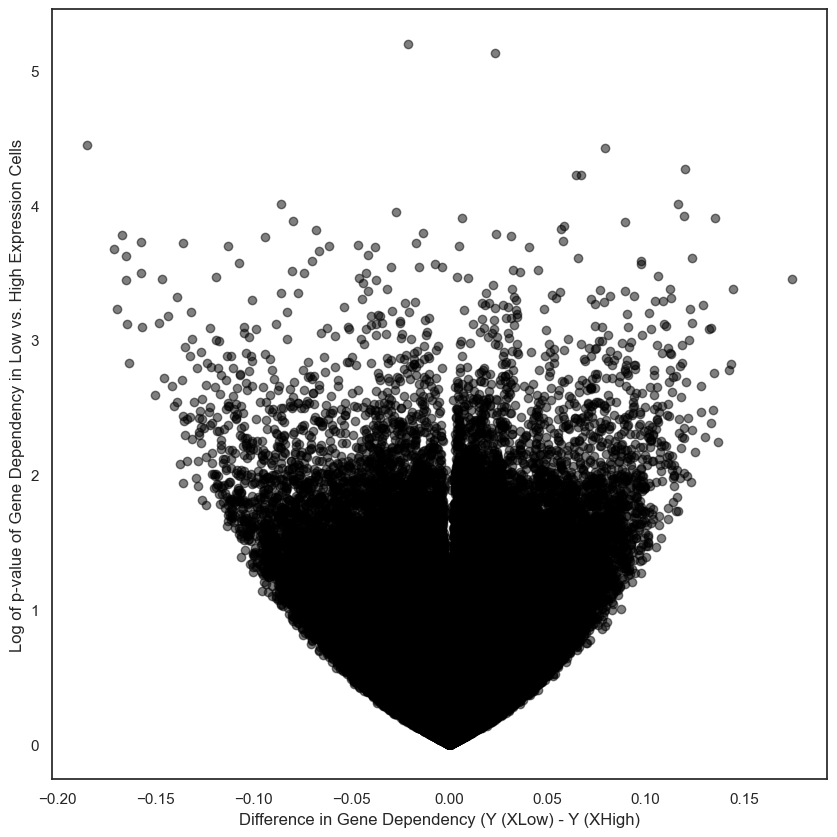

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='black')

# Axis Labels
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)')
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells')

In [ ]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_df.shape[0] * gene_effect_matrix_df.shape[1])
MANUAL = 3
# Rows where the p-value is less than 0.05
significant_rows_df = log_gene_effect_matrix_df[log_gene_effect_matrix_df > MANUAL]

# Fill NAN with 1
#significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APBB1,APLNR,APP,ARID1A,...,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZNHIT1,ZZZ3
ACTB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACTL6A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ACTL6B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AKAP8L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Retrieve the gene tuples where the p-value is less than 0.05
pos_significant_gene_tuples = []

for gene in significant_rows_df.columns:
    for gene2 in significant_rows_df.index:
        if (log_gene_effect_matrix_df[gene][gene2] > MANUAL) and (gene_diff_matrix_df[gene][gene2] >= .05):
            pos_significant_gene_tuples.append((gene, gene2))
        else:
            continue
print(len(pos_significant_gene_tuples))
pos_significant_gene_tuples = list(pos_significant_gene_tuples)
pos_significant_gene_tuples_df = pd.DataFrame(pos_significant_gene_tuples, columns=['Gene 1', 'Gene 2'])


48


In [ ]:
neg_significant_gene_tuples = []

for gene in significant_rows_df.columns:
    for gene2 in significant_rows_df.index:
        if (log_gene_effect_matrix_df[gene][gene2] > MANUAL) and (gene_diff_matrix_df[gene][gene2] <= -.05):
            neg_significant_gene_tuples.append((gene, gene2))
        else:
            continue

neg_significant_gene_tuples = list(neg_significant_gene_tuples)
print(len(neg_significant_gene_tuples))

neg_significant_gene_tuples_df = pd.DataFrame(neg_significant_gene_tuples, columns=['Gene 1', 'Gene 2'])
neg_significant_gene_tuples_df.head(5)

 

47


,Gene 1,Gene 2
0,ARID1B,PAX7
1,ATAD2,PRDM14
2,BRD2,PCGF1
3,CENPE,MYB
4,CENPF,CBX1


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

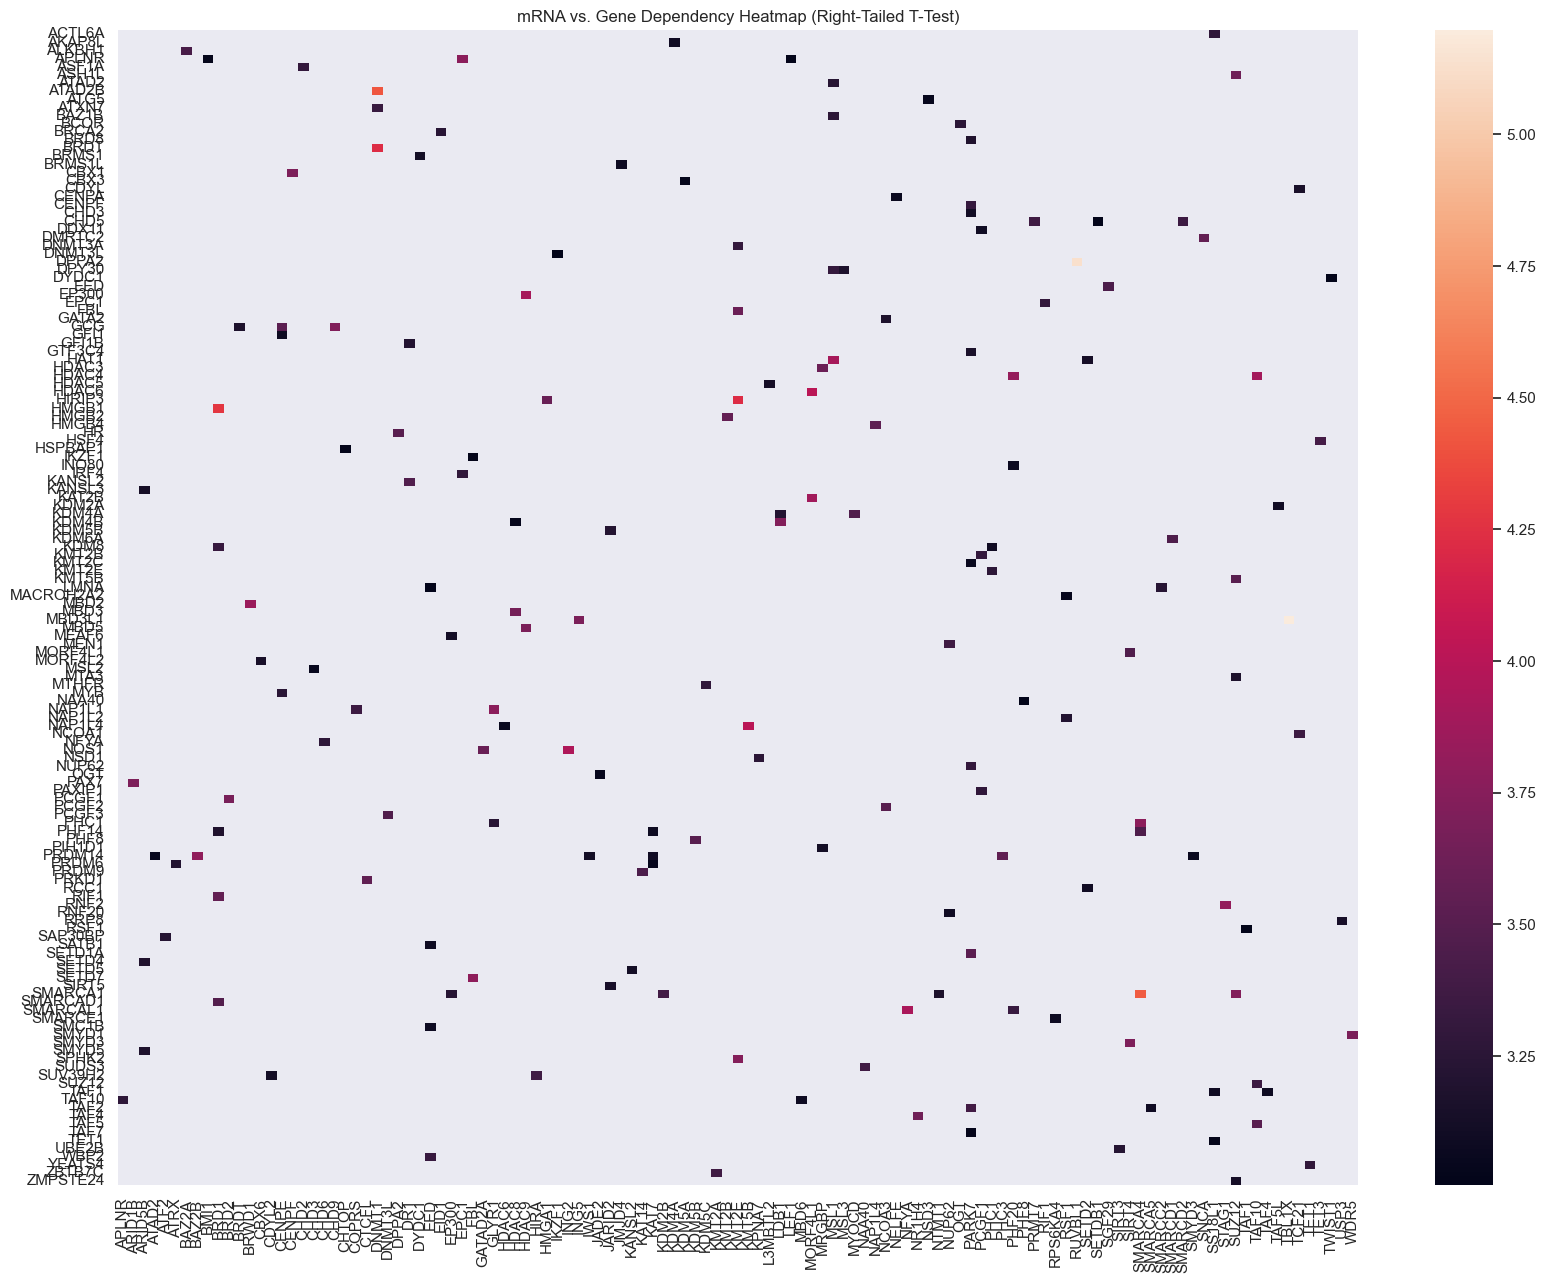

In [ ]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
significant_rows_df_filter = log_gene_effect_matrix_df[log_gene_effect_matrix_df > MANUAL].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, cmap='rocket', xticklabels=True, yticklabels=True, cbar=True)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


In [ ]:
len(significant_rows_df_filter[significant_rows_df_filter != 1].notnull().sum(axis=1).sort_values(ascending=False))

142

##### Figures Factory

In [ ]:
sns.set_style('white')

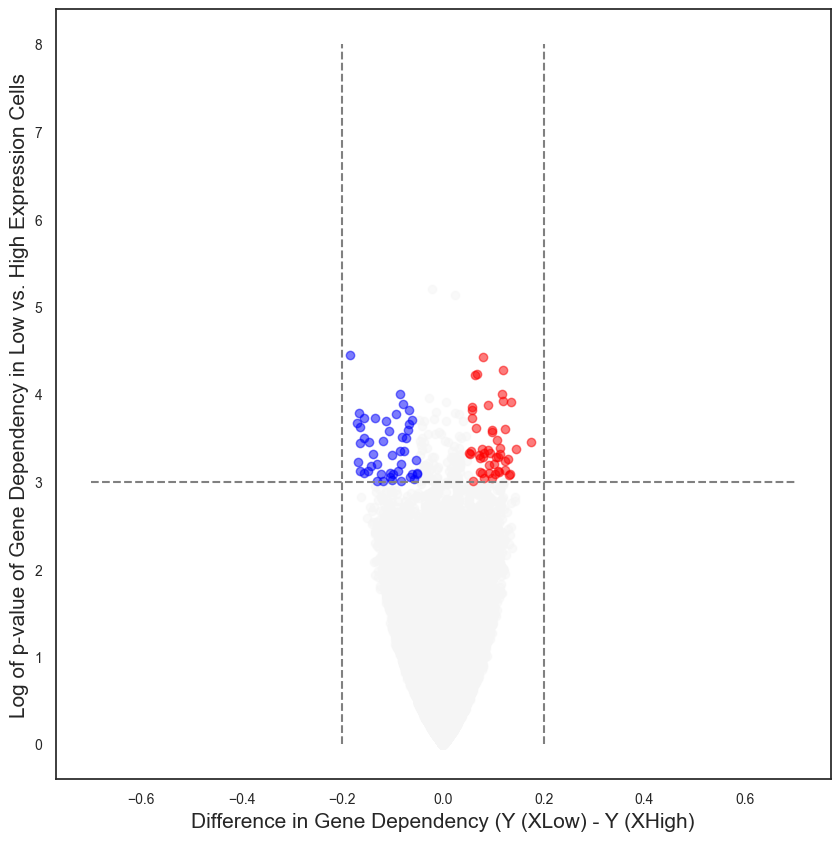

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='whitesmoke')

# Axis Labels
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .05, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.05, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.5, color='red')
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.5, color='blue')
        
name = 'Volcano Plot of Significant Negative and Positive Gene Pairs'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

In [ ]:
print(len(pos_significant_gene_tuples_df))

0


In [ ]:
print(len(neg_significant_gene_tuples_df))

0


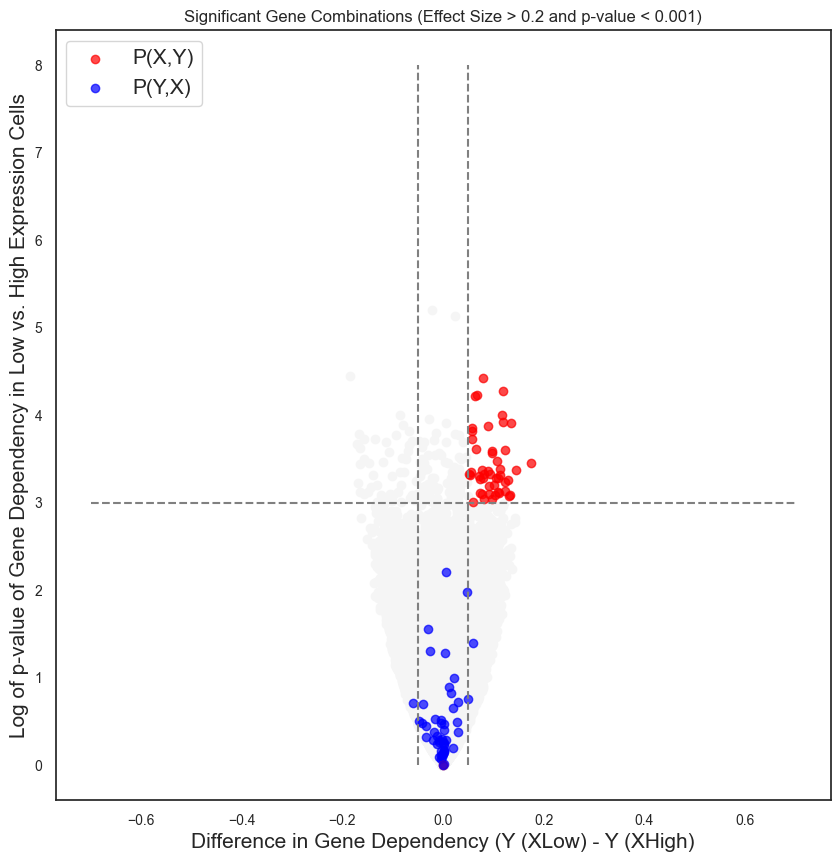

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Axis Labels
plt.title('Significant Gene Combinations (Effect Size > 0.2 and p-value < 0.001)')
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .05, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.05, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='red')
# Color genes in neg_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[1]][genes[0]], log_gene_effect_matrix_df[genes[1]][genes[0]], alpha=0.7, color='blue')
        

# Red and Blue in legend
plt.scatter(0,0, alpha=0.7, color='red', label='P(X,Y)')
plt.scatter(0,0, alpha=0.7, color='blue', label='P(Y,X)')
plt.legend(loc='upper left', fontsize=15)

name = 'positive significant gene combinations swapped'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

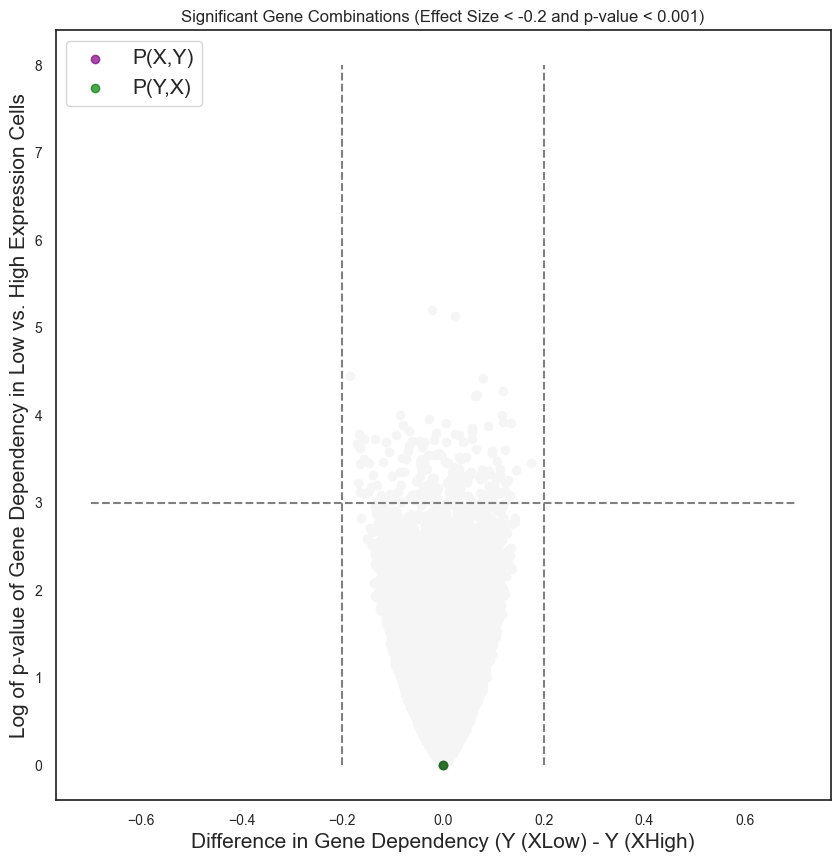

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Axis Labels
plt.title('Significant Gene Combinations (Effect Size < -0.2 and p-value < 0.001)')
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')



# Color genes in pos_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[1]][genes[0]], log_gene_effect_matrix_df[genes[1]][genes[0]], alpha=0.7, color='green')
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='purple')
# Red and Blue in legend
plt.scatter(0,0, alpha=0.7, color='purple', label='P(X,Y)')
plt.scatter(0,0, alpha=0.7, color='green', label='P(Y,X)')
plt.legend(loc='upper left', fontsize=15)

name = 'negative significant gene combinations swapped'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')
 


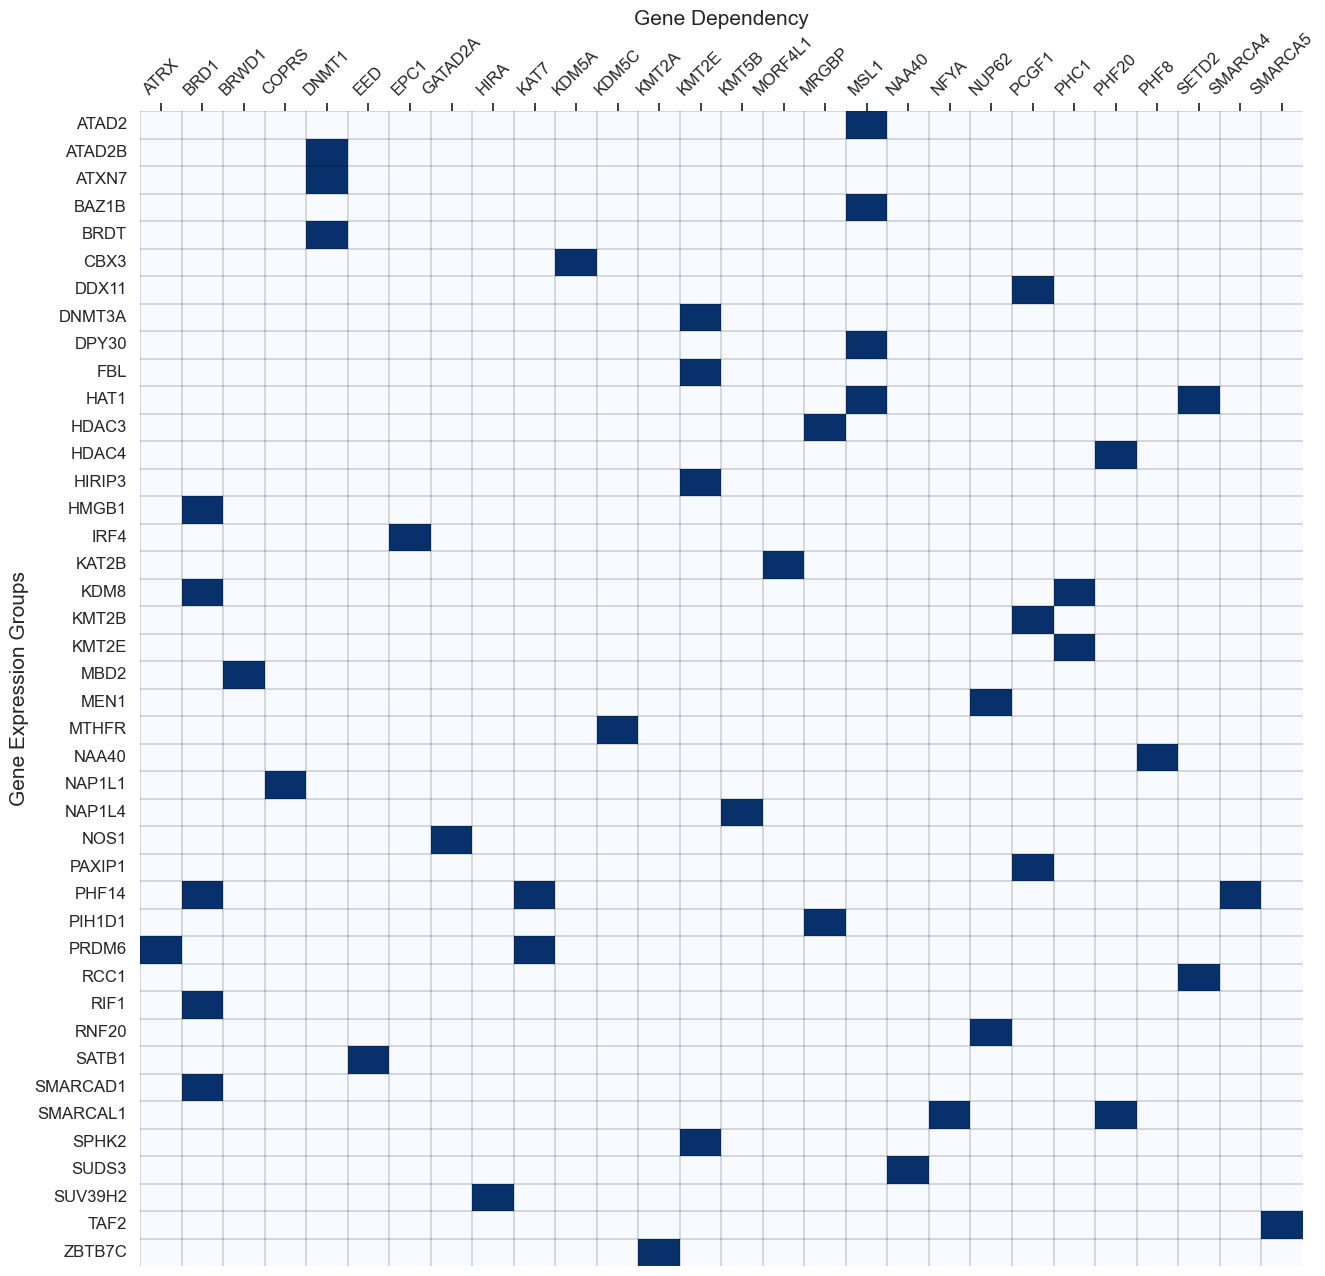

In [ ]:
pos_y = pos_significant_gene_tuples_df['Gene 1'].value_counts().index
pos_x = pos_significant_gene_tuples_df['Gene 2'].value_counts().index

pos_heatmap_df = pd.DataFrame(index=pos_x, columns=pos_y)

pos_heatmap_df.sort_index(inplace=True)
pos_heatmap_df.sort_index(axis=1, inplace=True)

for i, genes in pos_significant_gene_tuples_df.iterrows():
    pos_heatmap_df.loc[genes[1]][genes[0]] = 1
pos_heatmap_df.fillna(0, inplace=True)

plt.figure(figsize=(15,15))

ax = sns.heatmap(pos_heatmap_df, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df.columns)):
    ax.axvline(i, color='black', lw=.2)
    
# plt.title('Significant Gene Combinations (Effect Size > 0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15)
plt.xlabel('Gene Dependency', size = 15)
plt.xticks(size=12, rotation = 45)
plt.yticks(size=12)

# move xlabel to the top
ax.xaxis.set_label_position('top')

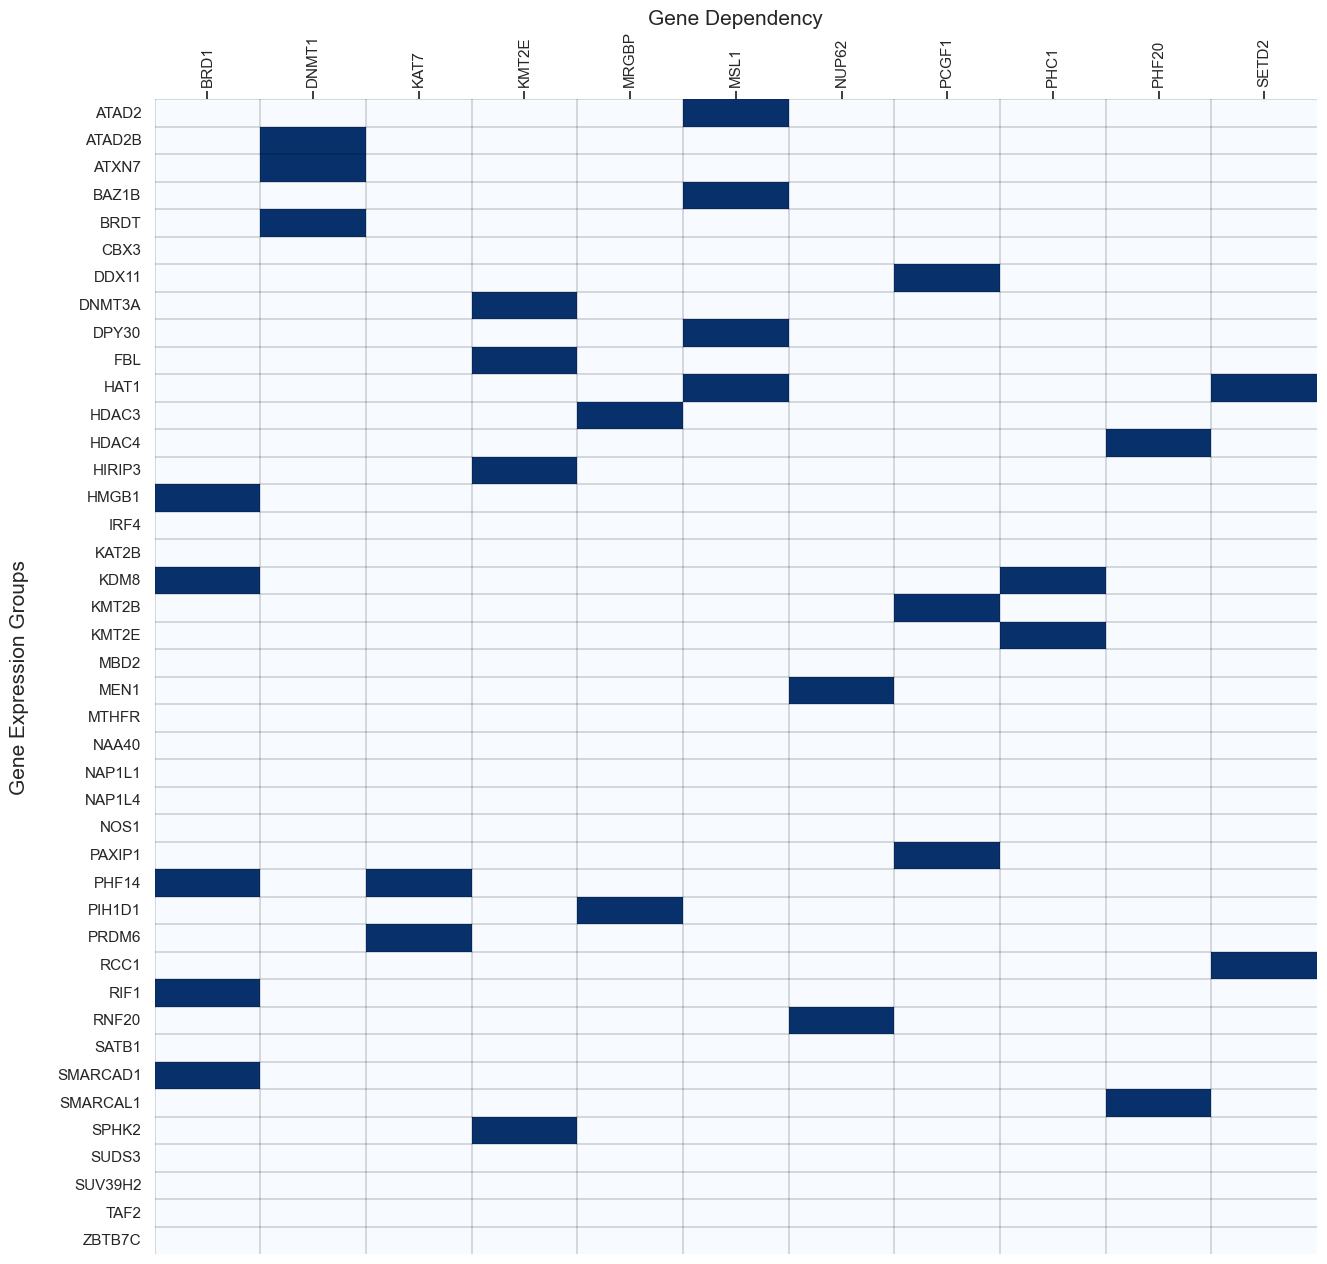

In [ ]:
pos_y = pos_significant_gene_tuples_df['Gene 1'].value_counts().index
pos_x = pos_significant_gene_tuples_df['Gene 2'].value_counts().index

pos_heatmap_df = pd.DataFrame(index=pos_x, columns=pos_y)

pos_heatmap_df.sort_index(inplace=True)
pos_heatmap_df.sort_index(axis=1, inplace=True)

for i, genes in pos_significant_gene_tuples_df.iterrows():
    pos_heatmap_df.loc[genes[1]][genes[0]] = 1
pos_heatmap_df.fillna(0, inplace=True)

# index rows by pos_heatmap_df.sum(axis=1) > 1.index
dependency_filter = pos_heatmap_df.sum(axis=0) > 1
dependency_index = list(dependency_filter[dependency_filter == True].index)

#experssion_filter = pos_heatmap_df.sum(axis=1) > 1
#experssion_index = list(experssion_filter[experssion_filter == True].index)

pos_heatmap_df_filter = pos_heatmap_df[dependency_index]
#pos_heatmap_df_filter = pos_heatmap_df_filter.loc[experssion_index]

plt.figure(figsize=(15,15))

ax = sns.heatmap(pos_heatmap_df_filter, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df_filter)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df_filter.columns)):
    ax.axvline(i, color='black', lw=.2)
    
#plt.title('Significant Gene Combinations (Effect Size > 0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15, labelpad=20)
plt.xlabel('Gene Dependency', size = 15)

# move xlabel to the top
ax.xaxis.set_label_position('top')

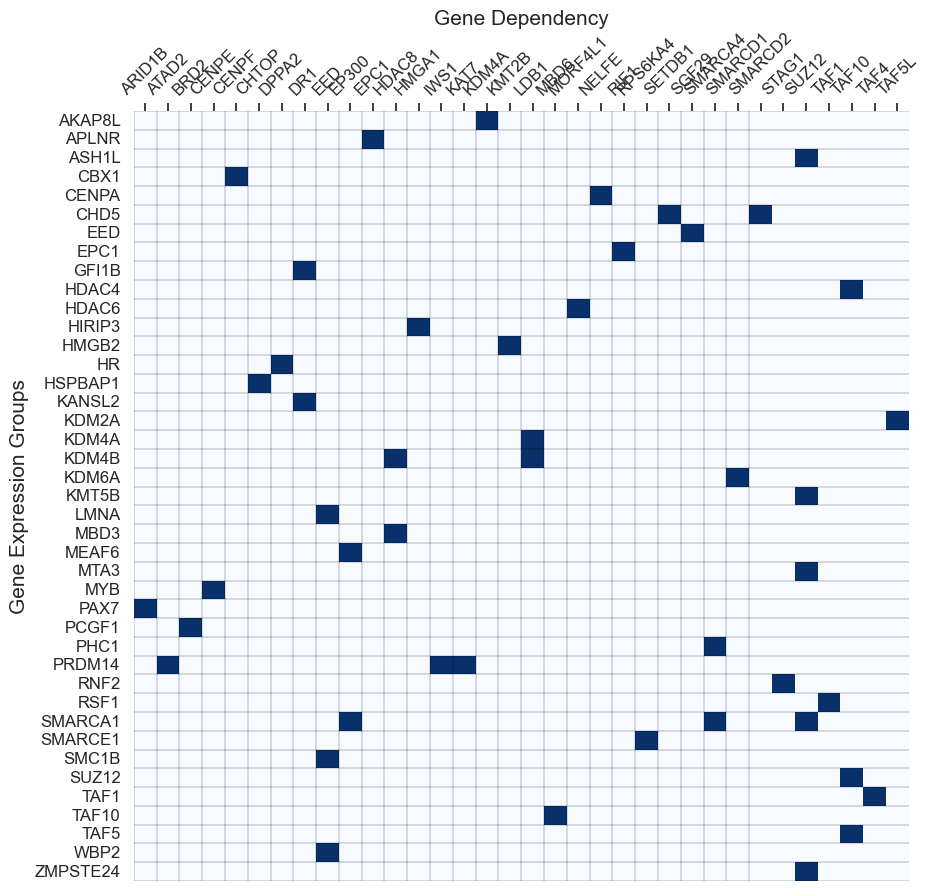

In [ ]:
neg_y = neg_significant_gene_tuples_df['Gene 1'].value_counts().index
neg_x = neg_significant_gene_tuples_df['Gene 2'].value_counts().index

neg_heatmap_df = pd.DataFrame(index=neg_x, columns=neg_y)

for i, genes in neg_significant_gene_tuples_df.iterrows():
    neg_heatmap_df.loc[genes[1]][genes[0]] = 1
    
neg_heatmap_df.sort_index(inplace=True)
neg_heatmap_df.sort_index(axis=1, inplace=True)


plt.figure(figsize=(10,10))
    
neg_heatmap_df.fillna(0, inplace=True)
ax = sns.heatmap(neg_heatmap_df, cmap='Blues', cbar=False)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.xticks(rotation=90)

# draw lines
for i in range(len(pos_heatmap_df)):
    ax.axhline(i, color='black', lw=.2)

for i in range(len(pos_heatmap_df.columns)):
    ax.axvline(i, color='black', lw=.2)
    
# plt.title('Significant Gene Combinations (Effect Size < -0.2 and p-value < 0.001)')
plt.ylabel('Gene Expression Groups', size = 15)
plt.xlabel('Gene Dependency', size = 15)
plt.xticks(size=12, rotation=45)
plt.yticks(size=12)
# move xlabel to the top
ax.xaxis.set_label_position('top')

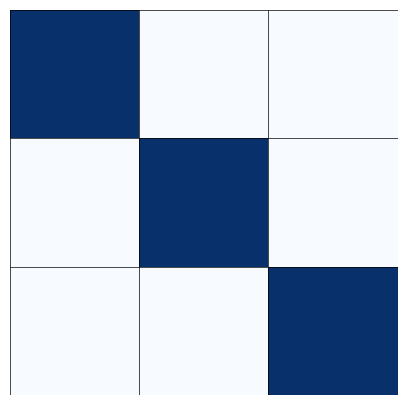

In [ ]:
# 3x3 Heatmap
dummy_df = pd.DataFrame(index=['Gene A', 'Gene B', 'Gene C'], columns=['Gene A', 'Gene B', 'Gene C'])
dummy_df.fillna(0, inplace=True)
dummy_df.loc['Gene A']['Gene A'] = 1
dummy_df.loc['Gene B']['Gene B'] = 1
dummy_df.loc['Gene C']['Gene C'] = 1


plt.figure(figsize=(5,5))
ax = sns.heatmap(dummy_df, cmap='Blues', cbar=False)

# remove yticks
ax.set(yticks=[])
ax.set(xticks=[])

# draw lines
for i in range(len(dummy_df)):
    ax.axhline(i, color='black', lw=.5)

for i in range(len(dummy_df.columns)):
    ax.axvline(i, color='black', lw=.5)
    
# transparent save
plt.savefig('heatmap.png', transparent=True)
    



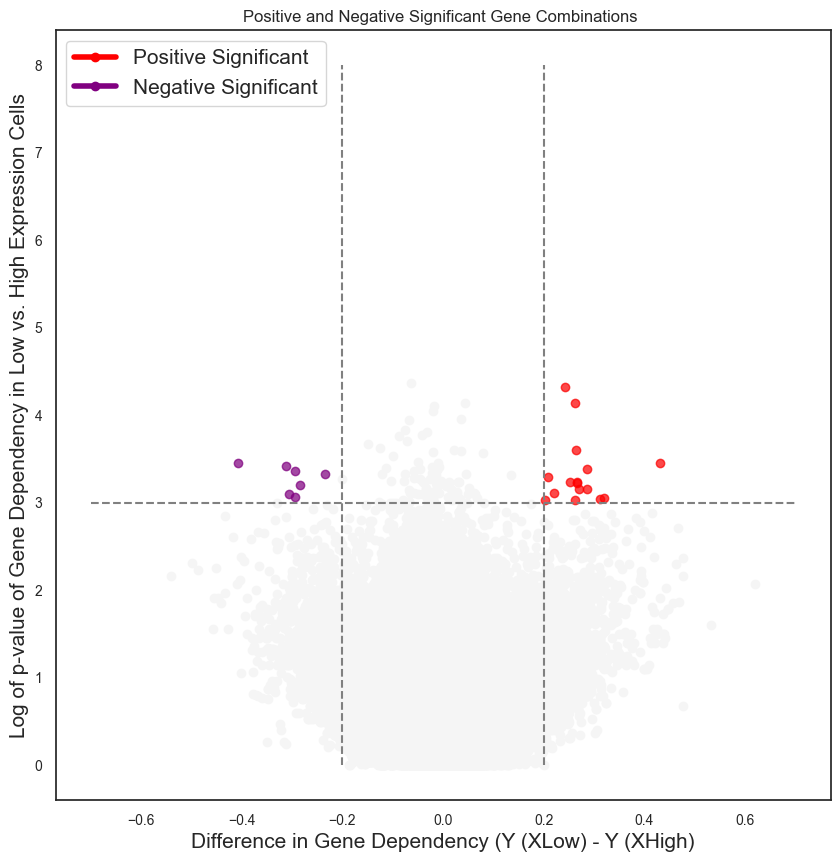

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], color='whitesmoke')

# Color genes in pos_significant_gene_tuples_df
for i, genes in pos_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='red')
    
# Color genes in neg_significant_gene_tuples_df
for i, genes in neg_significant_gene_tuples_df.iterrows():
        plt.scatter(gene_diff_matrix_df[genes[0]][genes[1]], log_gene_effect_matrix_df[genes[0]][genes[1]], alpha=0.7, color='purple')

# Axis Labels
plt.title('Positive and Negative Significant Gene Combinations ')
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

# Red and Purple Legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='red', lw=4, marker='o'),
                Line2D([0], [0], color='purple', lw=4, marker='o')]
plt.legend(custom_lines, ['Positive Significant', 'Negative Significant'], loc='upper left', fontsize=15)

name = 'positive and negative significant gene combinations'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


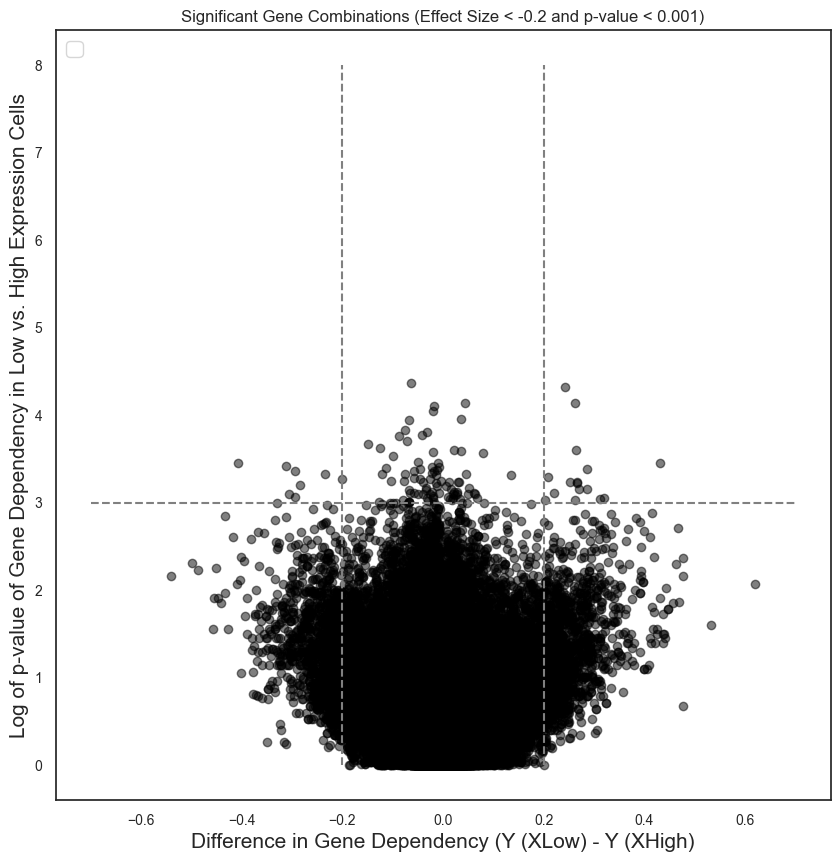

In [ ]:
plt.figure(figsize=(10,10))

for gene in vip_genes:
    plt.scatter(gene_diff_matrix_df[gene], log_gene_effect_matrix_df[gene], alpha=0.5, color='black')

# Axis Labels
plt.title('Significant Gene Combinations (Effect Size < -0.2 and p-value < 0.001)')
plt.xlabel('Difference in Gene Dependency (Y (XLow) - Y (XHigh)', size = 15)
plt.ylabel('Log of p-value of Gene Dependency in Low vs. High Expression Cells', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.hlines(y = 3, xmin = -.7, xmax = .7, color='grey', linestyles='dashed')
plt.vlines(x = .2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')
plt.vlines(x = -.2, ymin = 0, ymax = 8, color='grey', linestyles='dashed')

plt.legend(loc='upper left', fontsize=15)

No significant genes for mRNA expression


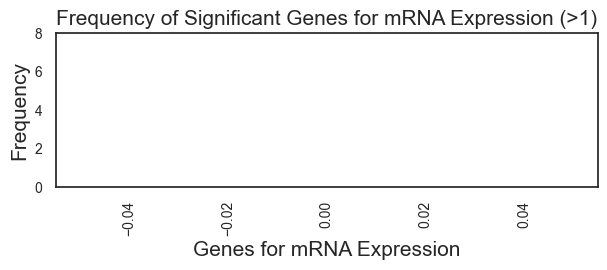

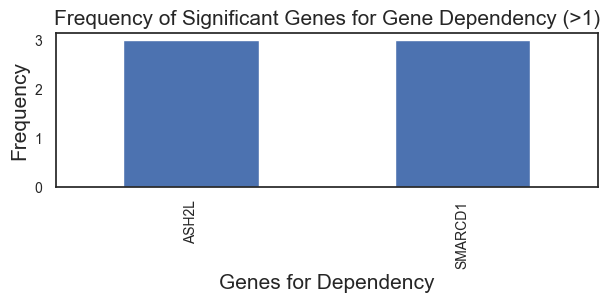

In [ ]:
# Boolean array if it contains any value
plt.figure(figsize=(7,2))
pos_heatmap_df_bool = pos_heatmap_df.astype(bool)
# drop if sum is less than 1
pos_heatmap_expression_sum = pos_heatmap_df_bool.sum(axis=1).sort_values(ascending=False)

try:
    pos_heatmap_expression_sum[pos_heatmap_expression_sum > 1].plot(kind='bar')
except:
    print('No significant genes for mRNA expression')
    

plt.title('Frequency of Significant Genes for mRNA Expression (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for mRNA Expression', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,8)

name = 'frequency of significant genes for mRNA expression'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(7,2))
pos_heatmap_dependency_sum = pos_heatmap_df_bool.sum(axis=0).sort_values(ascending=False)

try:
    pos_heatmap_dependency_sum[pos_heatmap_dependency_sum > 1].plot(kind='bar')
except:
    print('No significant genes for gene dependency')

plt.title('Frequency of Significant Genes for Gene Dependency (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for Dependency', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

name = 'frequency of significant genes for gene dependency'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

No significant genes for mRNA expression
No significant genes for gene dependency


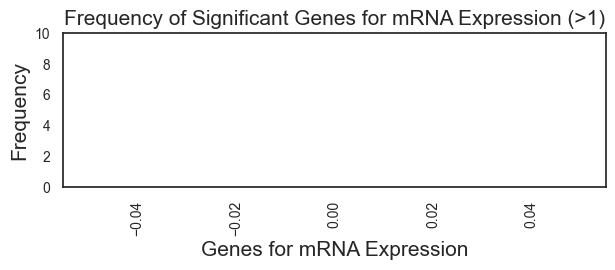

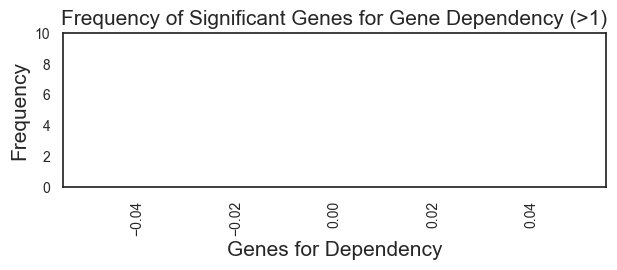

In [ ]:
# Boolean array if it contains any value
plt.figure(figsize=(7,2))
neg_heatmap_df_bool = neg_heatmap_df.astype(bool)
# drop if sum is less than 1
neg_heatmap_expression_sum = neg_heatmap_df_bool.sum(axis=1).sort_values(ascending=False)
try:
    neg_heatmap_expression_sum[neg_heatmap_expression_sum > 1].plot(kind='bar')
except:
    print('No significant genes for mRNA expression'
          )
plt.title('Frequency of Significant Genes for mRNA Expression (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for mRNA Expression', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,10)

name = 'negative frequency of significant genes for mRNA expression'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

plt.figure(figsize=(7,2))
neg_heatmap_dependency_sum = neg_heatmap_df_bool.sum(axis=0).sort_values(ascending=False)

try:
    neg_heatmap_dependency_sum[neg_heatmap_dependency_sum > 1].plot(kind='bar')
except:
    print('No significant genes for gene dependency')

plt.title('Frequency of Significant Genes for Gene Dependency (>1)', size = 15)
plt.ylabel('Frequency', size = 15)
plt.xlabel('Genes for Dependency', size = 15)
plt.xticks(size=10)
plt.yticks(size=10)

plt.ylim(0,10)

name = 'negative frequency of significant genes for gene dependency'
plt.savefig(save_path + name + '.png', dpi=300, bbox_inches='tight')

Text(0.05, 0.5, 'KO Dependency of Gene B')

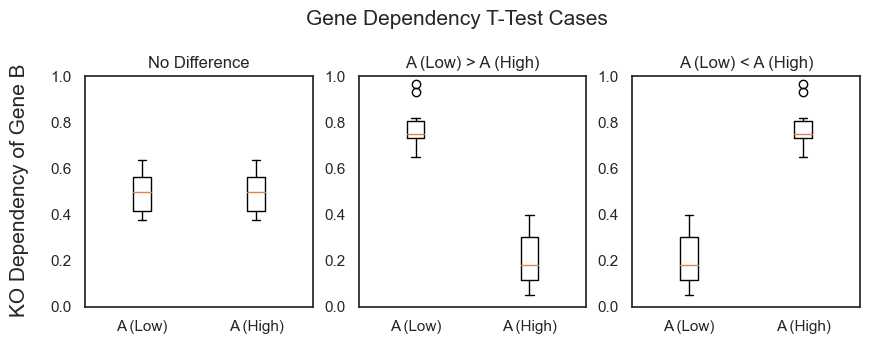

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,3))

no_diff = np.full(shape=10, fill_value=.5)
diff = np.full(shape=10, fill_value=.75)
neg_diff = np.full(shape=10, fill_value=.25)

# generate array from probability
no_diff = np.random.normal(loc=.5, scale=.1, size=10)
diff = np.random.normal(loc=.75, scale=.1, size=10)
neg_diff = np.random.normal(loc=.25, scale=.1, size=10)

# boxplots
ax[0].boxplot([no_diff, no_diff])
ax[1].boxplot([diff, neg_diff])
ax[2].boxplot([neg_diff, diff])

# set axis to 0 - 1
ax[0].set_ylim([0,1])
ax[1].set_ylim([0,1])
ax[2].set_ylim([0,1])

# x ticks
ax[0].set_xticklabels(['A (Low)', 'A (High)'])
ax[1].set_xticklabels(['A (Low)', 'A (High)'])
ax[2].set_xticklabels(['A (Low)', 'A (High)'])

# titles
ax[0].set_title('No Difference')
ax[1].set_title('A (Low) > A (High)')
ax[2].set_title('A (Low) < A (High)')

# super titles
fig.suptitle('Gene Dependency T-Test Cases ', size=15, y=1.1)

# super axis labels
#fig.text(0.5, 0.001, 'Gene Expression of A', ha='center', size=15)
# yaxis 
fig.text(0.05, 0.5, 'KO Dependency of Gene B', va='center', rotation='vertical', size=15)



Text(0.5, 1.0, 'Effect = Z (Xlow) - Z (Xhigh)')

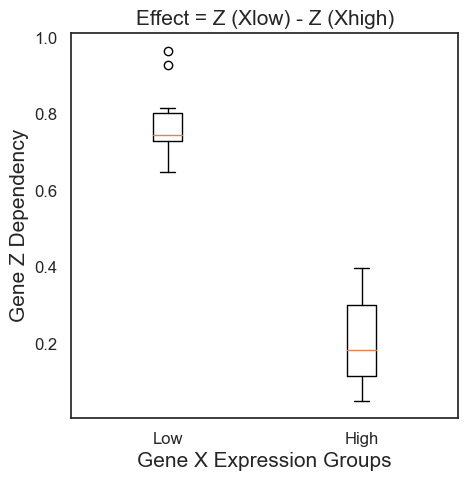

In [ ]:
plt.figure(figsize=(5,5))
plt.boxplot([diff, neg_diff])
plt.xlabel('Gene X Expression Groups', size = 15)
plt.xticks([1,2], ['Low', 'High'], size=12)
plt.ylabel('Gene Z Dependency', size = 15)
plt.yticks(size=12)

plt.title('Effect = Z (Xlow) - Z (Xhigh)', size = 15)

<AxesSubplot: >

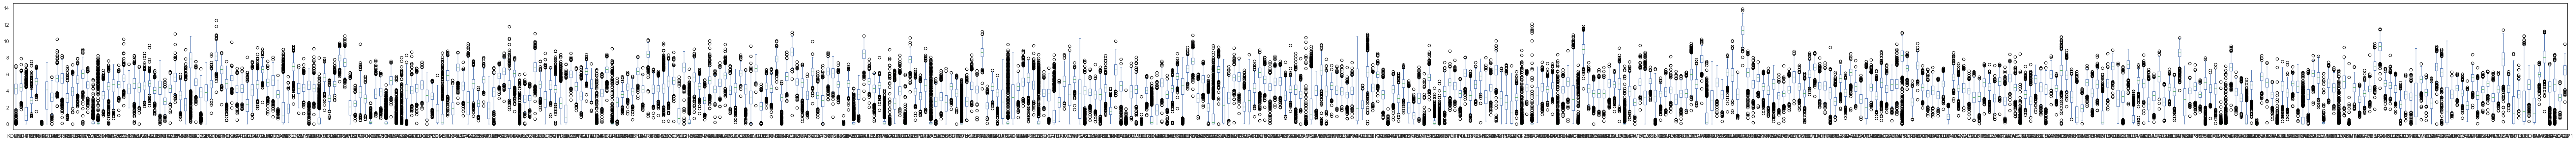

In [ ]:
full_mRNA_df[intersection].plot(kind='box', figsize=(100,5))

In [ ]:
full_chromatin_genes_quantiles['ARID1A']

0.2500    4.185073
0.2501    4.185519
Name: ARID1A, dtype: float64

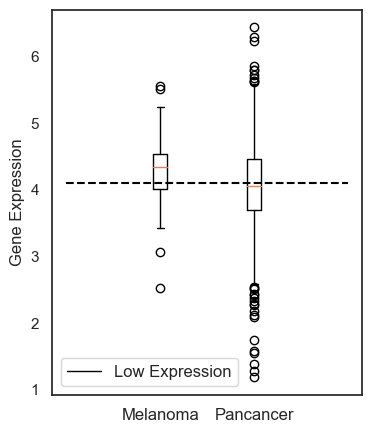

In [ ]:
plt.figure(figsize=(4,5))
plt.boxplot([mRNA_df[gene], full_mRNA_df[gene]])

plt.xticks([1,2], ['Melanoma', 'Pancancer'], size=12)
plt.ylabel('Gene Expression', size = 12)

plt.hlines(4.1, 0, 3, color='black', linestyle='--')
plt.legend(['Low Expression'], loc='lower left', fontsize=12, frameon=True)


(array([  1.,   1.,   1.,   4.,   4.,   5.,  14.,  19.,  32.,  52.,  84.,
        113., 143., 167., 138., 103.,  69.,  35.,  11.,   5.]),
 array([0.33342373, 0.66515132, 0.99687891, 1.3286065 , 1.66033409,
        1.99206168, 2.32378927, 2.65551686, 2.98724445, 3.31897204,
        3.65069962, 3.98242721, 4.3141548 , 4.64588239, 4.97760998,
        5.30933757, 5.64106516, 5.97279275, 6.30452034, 6.63624793,
        6.96797552]),
 <BarContainer object of 20 artists>)

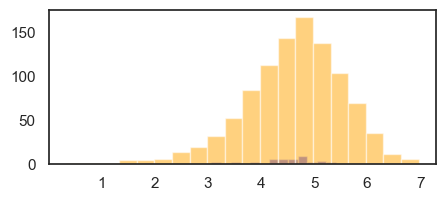

In [ ]:
# same figure as above but with distributions

plt.figure(figsize=(5,2))

plt.hist(mRNA_df[gene], bins=20, alpha=.5, color='blue')
plt.hist(full_mRNA_df[gene], bins=20, alpha=.5, color='orange')


C:\Users\commo\AppData\Local\Temp\ipykernel_12636\2724303763.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(full_mRNA_df[gene], alpha=.5, color='orange', shade=True)
C:\Users\commo\AppData\Local\Temp\ipykernel_12636\2724303763.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mRNA_df[gene], alpha=.5, color='blue', shade=True)


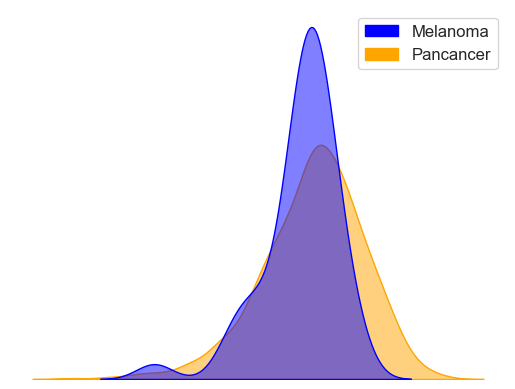

In [ ]:
gene = 'ARID1A'
sns.kdeplot(full_mRNA_df[gene], alpha=.5, color='orange', shade=True)
sns.kdeplot(mRNA_df[gene], alpha=.5, color='blue', shade=True)

plt.yticks([])
plt.ylabel('')
plt.xticks([])
plt.xlabel('')
# mpatches
import matplotlib.patches as mpatches

# blue and orange patches
blue_patch = mpatches.Patch(color='blue', label='Melanoma')
orange_patch = mpatches.Patch(color='orange', label='Pancancer')

# legend
plt.legend(handles=[blue_patch, orange_patch], loc='upper right', fontsize=12)

# remove plot frame
sns.despine(left=True, bottom=True)

# save as transparent
plt.savefig('gene expression distribution.png', dpi=300, bbox_inches='tight', transparent=True)

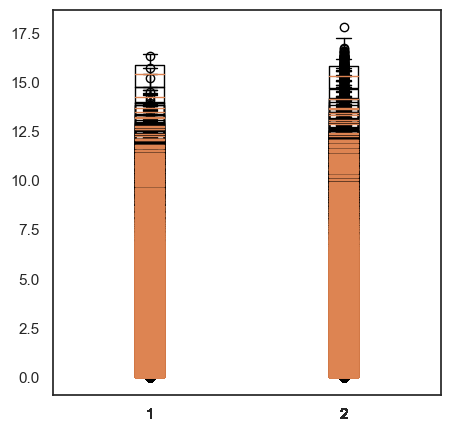

In [ ]:
# boxplot of mRNA_df and full_mRNA_df
plt.figure(figsize=(5,5))
for gene in mRNA_df.iloc[:,1:].columns:
    # side by side boxplot and app
    plt.boxplot([mRNA_df[gene], full_mRNA_df[gene]])


ValueError: X must have 2 or fewer dimensions

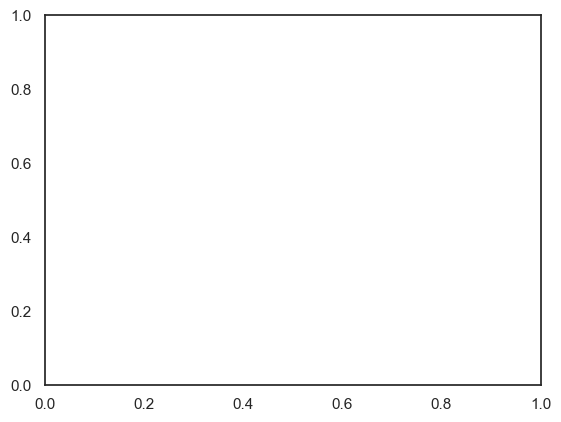

In [ ]:
plt.boxplot([mRNA_df[intersection], full_mRNA_df[intersection]])

##### Left-Sided T-Test

In [ ]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(448, 448)


C:\Users\commo\AppData\Local\Temp\ipykernel_16144\1436156346.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'less')


KeyboardInterrupt: 

In [ ]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [ ]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,ARID3A,...,WDR82,XBP1,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMYND11,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ALKBH1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')

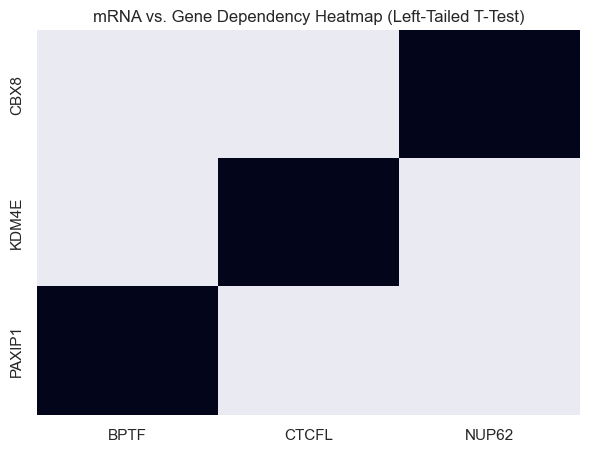

In [ ]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.heatmap(significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all'), vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)
plt.title('mRNA vs. Gene Dependency Heatmap (Left-Tailed T-Test)')


In [ ]:
# Manual Validation
gene = 'TRIM24'
gene2 = 'ZMPSTE24'
g1_expression = gene_groups[gene].index
g1_low_expression = gene_groups[gene_groups[gene] == 'low'].index
g1_high_expression = gene_groups[gene_groups[gene] == 'high'].index

g1_mrna = mRNA_df[gene]
g1_low_mrna = mRNA_df.loc[g1_low_expression, gene]
g1_high_mrna = mRNA_df.loc[g1_high_expression, gene]

g2_dependency = dependency_df[gene2]
g2_low_dependency = dependency_df.loc[g1_low_expression, gene2]
g2_high_dependency = dependency_df.loc[g1_high_expression, gene2]


g2_low_mrna = mRNA_df.loc[g1_low_expression, gene2]
g2_high_mrna = mRNA_df.loc[g1_high_expression, gene2]

# combine g2 low mrna and g2 high mrna to a dataframe
g2_mrna = pd.concat([g2_low_mrna, g2_high_mrna], axis=0)
g2_mrna = g2_mrna.to_frame()
g2_mrna['color'] = ['red'] * g2_low_mrna.shape[0] + ['blue'] * g2_high_mrna.shape[0]
g2_mrna.sort_index(inplace=True)




fig,ax = plt.subplots(1,3,figsize=(15,10))
sns.set(font_scale=1)


ax[0].scatter(g2_low_mrna, g2_low_dependency, color='red', alpha=0.5)
ax[0].set_title(gene2 + ' Dependency Score vs. mRNA Expression (Low ' + gene + ')')
ax[0].set_ylabel(gene2 + ' Dependency Score')
ax[0].set_xlabel(gene2 + ' mRNA Expression')

ax[1].scatter(g2_high_mrna, g2_high_dependency, color='blue', alpha=0.5)
ax[1].set_title(gene2 + ' Dependency Score vs. mRNA Expression (High ' + gene + ')')
ax[1].set_ylabel(gene2 + ' Dependency Score')
ax[1].set_xlabel(gene2 + ' mRNA Expression' )

# color by label
ax[2].scatter(g2_mrna.iloc[:,0], g2_dependency, color=g2_mrna['color'], alpha=0.5)
ax[2].set_title(gene2 + ' Dependency Score vs. mRNA Expression (' + gene + ')')
ax[2].set_ylabel(gene2 + ' Dependency Score')
ax[2].set_xlabel(gene2 + ' mRNA Expression' )
 


KeyError: 'TRIM24'

##### Right Sided T-Test

In [ ]:
 # Create a Matrix of Gene x Gene
gene_effect_matrix = np.zeros((gene_groups.shape[1], gene_groups.shape[1])) 
print(gene_effect_matrix.shape)

# Iterate through the genes
# For each gene, grab the low and high expression cell lines from the gene_groups dataframe
# Iterate through the other expression cell lines and then grab the gene dependency values
# from depdenency_df, index by the index of the cell line
for gene in vip_genes:
    low_expression = gene_groups[gene_groups[gene] == 'low'].index
    high_expression = gene_groups[gene_groups[gene] == 'high'].index
    
    for gene2 in vip_genes:
        low_expression_dependency = dependency_df.loc[low_expression, gene2]
        high_expression_dependency = dependency_df.loc[high_expression, gene2]
        
        # T-Test of Gene Dependency in Low and High Expression Cells
        ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')
        
        # Add the t-statistic to the gene effect matrix
        gene_effect_matrix[vip_genes[vip_genes == gene].index[0], vip_genes[vip_genes == gene2].index[0]] = ttest[1]
        
# Save
np.savetxt(save_path + 'mRNA vs. Gene Dependency Matrix.csv', gene_effect_matrix, delimiter=",")

(442, 442)


C:\Users\commo\AppData\Local\Temp\ipykernel_2732\2010492129.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  ttest = stats.ttest_ind(low_expression_dependency, high_expression_dependency,  alternative = 'greater')


In [ ]:
# Convert to PD
gene_effect_matrix_df = pd.DataFrame(gene_effect_matrix, columns=vip_genes, index=vip_genes)

# Remove NaN rows
gene_effect_matrix_plot = gene_effect_matrix[np.isnan(gene_effect_matrix).any(axis=1)]

In [ ]:
BONFERONNI_PVALUE = 0.05 / (gene_effect_matrix_plot.shape[0] * gene_effect_matrix_plot.shape[1])
# Rows where the p-value is less than 0.05
significant_rows_df = gene_effect_matrix_df[gene_effect_matrix_df < BONFERONNI_PVALUE]
# Fill NAN with 1
significant_rows_df.fillna(1, inplace=True)
significant_rows_df.head(5)



,ACTB,ACTL6A,ACTL6B,AKAP8,AKAP8L,ALKBH1,APLNR,ARID1A,ARID1B,ARID2,...,YEATS2,YEATS4,ZBTB33,ZBTB4,ZBTB7B,ZBTB7C,ZMPSTE24,ZMYND11,ZMYND8,ZZZ3
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6A,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTL6B,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
AKAP8L,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Text(0.5, 1.0, 'mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')

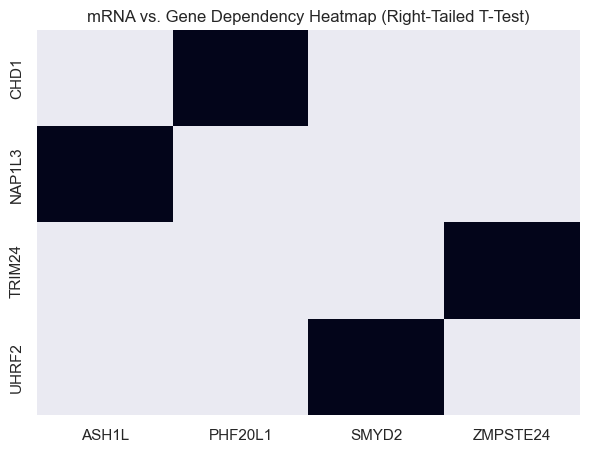

In [ ]:
# Rows that were < .05
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
significant_rows_df_filter = significant_rows_df[significant_rows_df < BONFERONNI_PVALUE].dropna(axis=0, how='all').dropna(axis=1, how='all')
sns.heatmap(significant_rows_df_filter, vmin=0, vmax=0.05, cmap='rocket', xticklabels=True, yticklabels=True, cbar=False)

plt.title('mRNA vs. Gene Dependency Heatmap (Right-Tailed T-Test)')


Text(0.5, 0, 'ZZZ3 mRNA Expression')

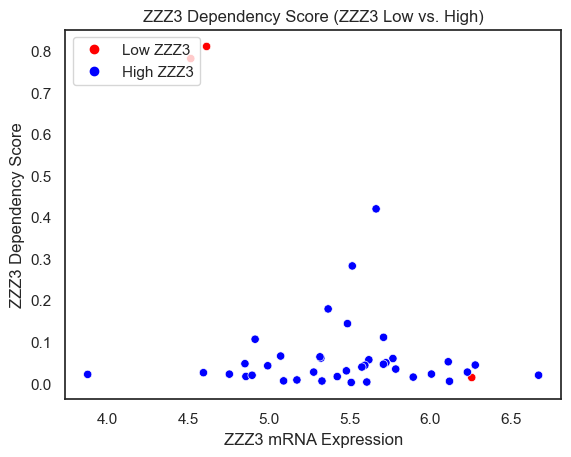

In [ ]:
import matplotlib.lines as mlines

# color by label
sns.set_style("white")
sns.scatterplot(x = g2_mrna.iloc[:,0], y = g2_dependency, hue=g2_mrna['color'].tolist(), palette=['blue', 'red'])
plt.title(gene2 + ' Dependency Score (' + gene + ' Low vs. High' + ')')

red_patch = mlines.Line2D([], [], color='red', marker='o', linestyle='None')
blue_patch =  mlines.Line2D([], [], color='blue', marker='o', linestyle='None')
plt.legend(loc='upper left', labels=['Low ' + gene, 'High ' + gene], handles=[red_patch, blue_patch])
plt.ylabel(gene2 + ' Dependency Score')
plt.xlabel(gene2 + ' mRNA Expression' )